# Keras

## Summary

- Introduction
- The Sequential model
- Layers API

### Keras in a nutshell

Keras is a high-level, user-friendly API for creating and training neural nets.

[![Keras logo](images/keras_logo.png)](https://keras.io)

### Keras and TensorFlow

- [TensorFlow](https://www.tensorflow.org/) is a platform for Machine Learning and Deep Learning created by Google.
- Originally, Keras could be used with many ML librairies as back-end for computations: TensorFlow 1.x, Theano, CNTK...
- Since TF 2.0, _tf.keras_ is the official high-level API of TensorFlow.
- The [2.3.0 release](https://github.com/keras-team/keras/releases/tag/2.3.0) (Sept. 2019) was the last major release of multi-backend Keras.
- "There is now only one Keras: *tf.keras*".

[TF 2.0 + Keras overview notebook](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO)

## The Sequential model

### Description

A *Sequential* model creates a plain stack of layers where each layer has exactly one input tensor and one output tensor.

It is the easiest way to create simple neural networks architectures with Keras.

### Example: creating a fully connected neural network

A *fully connected* or *dense* neural network is an architecture where all the nodes (neurons) in one layer are connected to the neurons in the next layer.

#### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_blobs

scikit-learn version: 0.22.1


In [4]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [5]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

#### Data generation

In [6]:
# Generate some data for training
# Each sample has 3 features and belongs to one of 2 classes
x_train, y_train = make_blobs(
    n_samples=1000, n_features=3, centers=2, cluster_std=2.0, random_state=11
)

#### Expected network architecture

![A simple neural network](images/neural_net2.jpeg)

#### Model creation

In [7]:
# Create a new sequential model
seq_model = Sequential()

# Add a 4-neurons layer using tanh as activation function
# Input shape corresponds to the input layer (number of features)
seq_model.add(Dense(4, activation='tanh', input_shape=(3,)))

# Add a 4-neurons layer using tanh
# Input shape is infered from previous layer
seq_model.add(Dense(4, activation='tanh'))

# Add a 1-neuron output layer using sigmoid
seq_model.add(Dense(1, activation='sigmoid'))

In [8]:
# Print a summary of model architecture
# Can you justify the parameter counts for each layer?
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [9]:
# Configuration of the training process
#   optimizer: gradient descent optimization method
#   loss: loss function
#   metrics: list of metrics monitored during training and testing
seq_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Model training

In [10]:
# Launch the training of the model on the data
#   epochs: number of epochs to train the model
#     An epoch is an iteration over the entire training dataset
#   batch_size: number of samples used for each gradient descent step
#     number of GD steps in an epoch = x_train.size / batch_size (rounded up)
#     total number of GD steps = epoch_GD_steps * epochs
#   verbose: level of information outputted during training
#     0 = silent, 1 = progress bar, 2 = one line per epoch
# The returned history object contains a record of loss and metrics values
history = seq_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 826us/sample - loss: 0.8076 - accuracy: 0.4880
Epoch 2/10
1000/1000 [==============================] - 0s 66us/sample - loss: 0.7115 - accuracy: 0.5110
Epoch 3/10
1000/1000 [==============================] - 0s 73us/sample - loss: 0.6221 - accuracy: 0.5970
Epoch 4/10
1000/1000 [==============================] - 0s 70us/sample - loss: 0.5348 - accuracy: 0.8430
Epoch 5/10
1000/1000 [==============================] - 0s 80us/sample - loss: 0.4597 - accuracy: 0.9740
Epoch 6/10
1000/1000 [==============================] - 0s 88us/sample - loss: 0.4027 - accuracy: 0.9760
Epoch 7/10
1000/1000 [==============================] - 0s 81us/sample - loss: 0.3540 - accuracy: 0.9800
Epoch 8/10
1000/1000 [==============================] - 0s 81us/sample - loss: 0.3115 - accuracy: 0.9840
Epoch 9/10
1000/1000 [==============================] - 0s 93us/sample - loss: 0.2743 - accuracy: 0.9850
Epoch 10/10
1000/1000 [=========

#### Model evaluation

In [11]:
# Compute the loss & metrics values for the trained network
loss, acc = seq_model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.22801
Training accuracy: 0.99300


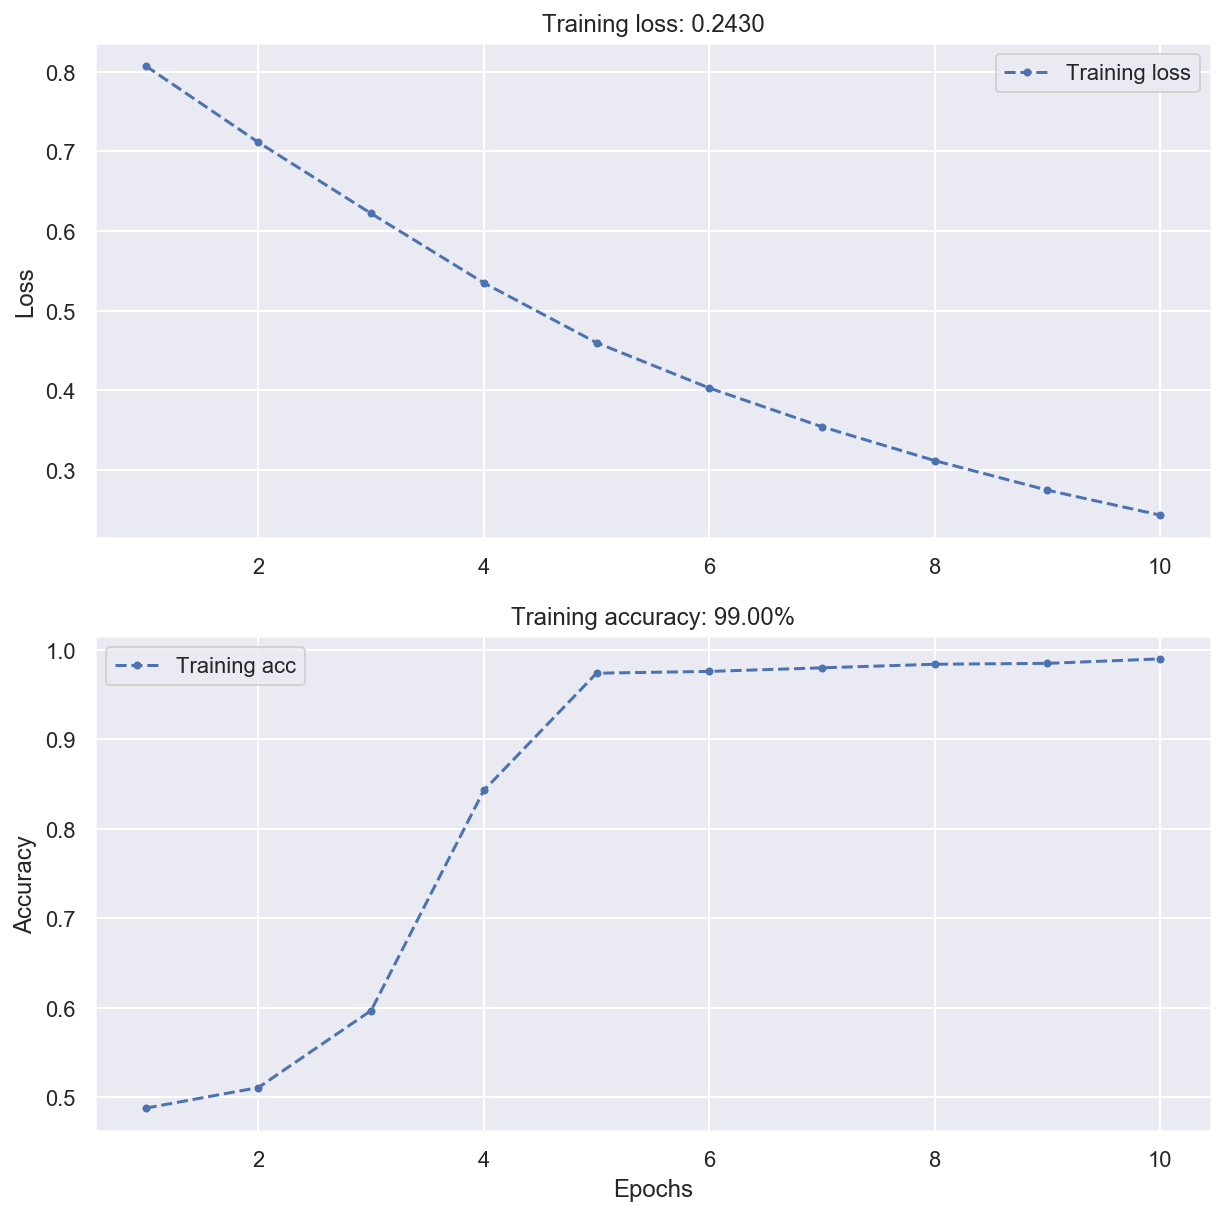

In [12]:
# Plot training metrics
plot_loss_acc(history)